# ML-3 Обучение с учителем. Классификация
###  Содержание <a class="anchor" id=0></a>
- [1. Введение](#1)
- [2. Логическая регрессия](#2)
- [2.2 Поиск параметров логической регрессии](#2-2)
- [3. Метрики классификации. Мультиклассовая классификация](#3)
- [4. Логическия регрессия. Практика](#4)
- [5. Деревья решений](#5)
- [6. Введение в ансамбли: бэггинг. Случайные лес](#6)
- [7. Деревья решений и случайный лес. Практика](#7)
- [8. Итоги](#8)

# 1. Введение <a class="anchor" id=1></a>

[к содержанию](#0)

# 2. Логическая регрессия <a class="anchor" id=2></a>

[к содержанию](#0)

Что вообще означает `«решить задачу классификации»`? Это значит **построить разделяющую поверхность в пространстве признаков**, которая делит пространство на части, каждая из которых соответствует определённому классу. 

Ниже представлены примеры разделяющих поверхностей, которые производят бинарную классификацию. Красным и синим цветом обозначены классы, зелёным — собственно поверхность, которая делит пространство признаков на две части. В каждой из этих частей находятся только наблюдения определённого класса.

<img src=ml3_img1.png>

Модели, которые решают задачу классификации, называются классификаторами (`classifier`).

Если взять в качестве разделяющей поверхности некоторую плоскость (ровная поверхность на первом рисунке), то мы получаем модель логистической регрессии, которая тесно связана с рассмотренной нами ранее линейной регрессией.

Давайте для начала вспомним, как выглядит уравнение модели линейной регрессии в общем случае:

<img src=ml3_img2.png>

>Но всё это работает только в том случае, когда целевой признак `y`, который мы хотим предсказать, является числовым, например цена, вес, время аренды и т. д.

Что же делать с этой моделью, когда целевой признак `y` является категориальным? Например, является письмо спамом или обычным письмом?

Можно предположить, что, раз у нас есть две категории, мы можем обозначить категории за `y = 1` (Спам) и `y = 0` (Не спам) и обучить линейную регрессию предсказывать `0` и `1`.

Но результат будет очень плохим. Выглядеть это будет примерно так:

<img src=ml3_img3.png>

Для больших значений `x` прямая будет выдавать значения **больше 1**, а для очень маленьких — **меньше 0**. Что это значит? Непонятно. Непонятно и то, что делать со значениями в диапазоне от 0 до 1. Да, можно относить значения на прямой выше 0.5 к классу 1, а меньше либо равным 0.5 — к классу 0, но это всё «костыли».

>Идея! Давайте переведём задачу классификации в задачу регрессии. Вместо предсказания класса будем предсказывать вероятность принадлежности к этому классу. 

Модель должна выдавать некоторую вероятность `P`, которая будет определять, принадлежит ли данный объект к классу 1: например, вероятность того, что письмо является спамом. При этом вероятность того, что письмо является обычным письмом (класс 0), определяется как `Q = 1 - P`.  

Когда модель будет обучена на предсказание вероятности, мы зададим некоторый порог вероятности. Если предсказанная вероятность будет выше этого порога, мы определим объект к классу 1, а если ниже — к классу 0.

Например, стандартный порог равен `0.5`. То есть если вероятность `P > 0.5`, мы будем считать письмо спамом, а если `P <= 0.5` — обычным информативным письмом.

В итоге мы добьёмся того, что будем предсказывать не дискретный категориальный, а непрерывный числовой признак, который лежит в диапазоне `[0, 1]`. А это уже знакомая нам задача регрессии.

>Однако остался главный вопрос: как научить модель предсказывать вероятности, ведь они должны лежать строго в диапазоне от 0 до 1, а предсказания линейной регрессии лежат в диапазоне от `-inf` до `+inf`? 

Тут-то мы и приходим к модели логистической регрессии — **регрессии вероятностей**.

## ОБЩЕЕ ПРЕДСТАВЛЕНИЕ О ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ

Логистическая регрессия (`Logistic Regression`) — одна из простейших моделей для решения задачи классификации. Несмотря на простоту, модель входит в топ часто используемых алгоритмов классификации в `Data Science`.

В основе логистической регрессии лежит логистическая функция (`logistic function`) `sigma` — отсюда и название модели. Однако более распространённое название этой функции — сигмόида (`sigmoid`). Записывается она следующим образом:

<img src=ml3_img4.png>

<img src=ml3_img5.png>

<img src=ml3_img6.png>

## Чего мы добились таким преобразованием?

Если мы обучим модель, то есть подберём  коэффициенты `w0, w1,... , w_m` (как их найти, обсудим чуть позже) таким образом, что для объектов класса 1 модель линейной регрессии начнёт выдавать положительное число, а для класса 0 — выдавать отрицательное число, то тогда, подставив предсказание линейной регрессии `z` в сигмоиду, мы сможем получать вероятности принадлежности к каждому из классов в диапазоне от `0` до `1`.

Далее по порогу вероятности мы сможем определять, к какому классу принадлежит объект.

Это и есть наша цель. Мы свели задачу классификации к задаче регрессии для предсказания вероятностей. 

Для бинарной классификации описанное выше будет выглядеть следующим образом:

<img src=ml3_img7.png>

<img src=ml3_img8.png>



## Разберёмся с геометрией

Возьмём частный случай, когда класс объекта зависит от двух признаков — `x1` и `x2`.

## Рассмотрим пример.

Мы пытаемся предсказать поступление студента в университет в зависимости от результатов двух экзаменов. Целевой признак  — результат поступления в аспирантуру (admission outcome) с двумя возможными значениями: поступил или не поступил. Факторы: `x1` — результат сдачи первого экзамена (Exam1 Score) и `x2` — результат сдачи второго (Exam 2 Score). Будем предсказывать вероятность поступления с помощью логистической регрессии.

Изобразим зависимость в пространстве двух факторов (вид сверху) в виде диаграммы рассеяния, а целевой признак отобразим в виде точек (непоступившие) и крестиков (поступившие).

Если рассматривать уравнение линейной регрессии отдельно от сигмоиды, то геометрически построить логистическую регрессию на основе двух факторов — значит найти такие коэффициенты `w0`, `w1` и `w2` уравнения плоскости, при которых наблюдается наилучшее разделение пространства на две части.

`z = w0 + w1*x1 + w2*x2`

Тогда выражение для `z` будет задавать в таком пространстве плоскость (в проекции вида сверху — прямую), которая разделяет всё пространство на две части. Над прямой вероятность поступления будет `>0.5`, а под прямой `<0.5`:

<img src=ml3_img9.png>

## В чём математический секрет?

Математически подстановка в уравнение плоскости точки, которая не принадлежит ей (находится ниже или выше), означает вычисление расстояния от этой точки до плоскости.

* Если точка находится ниже плоскости, расстояние будет отрицательным `z < 0`.
* Если точка находится выше плоскости, расстояние будет положительным `z > 0`.
* Если точка находится на самой плоскости, `z = 0`.

Мы знаем, что подстановка отрицательных чисел в сигмоиду приведёт к вероятности `P < 0.5`, а постановка положительных — к вероятности `P > 0.5`. 

>Таким образом, ключевым моментом в предсказании логистической регрессии является расстояние от точки до разделяющей плоскости в пространстве факторов. Это расстояние в литературе часто называется **отступом** (`margin`). 

В этом и состоит секрет работы логистической регрессии.

>Чем больше расстояние от точки, находящейся выше разделяющей плоскости, до самой плоскости, тем больше оценка вероятности принадлежности к классу 1.

Попробуйте подставить различные координаты точек в модель логистической регрессии и убедитесь в этом.

Можно построить тепловую карту, которая показывает, чему равны вероятности в каждой точке пространства:

<img src=ml3_img10.png>

>На рисунке точки, которые относятся к классу непоступивших абитуриентов, лежащие ниже разделяющей плоскости, находятся в красной зоне. Чем насыщеннее красный цвет, тем ниже вероятность того, что абитуриент поступит в аспирантуру. И наоборот, точки, которые относятся к классу поступивших абитуриентов, лежащие выше разделяющей плоскости, находятся в синей зоне. Чем насыщеннее синий цвет, тем выше вероятность того, что абитуриент поступит в аспирантуру.

<img src=ml3_img11.png>

<img src=ml3_img12.png>

# ПОИСК ПАРАМЕТРОВ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ <a class="anchor" id=2-2></a>

[к содержанию](#0)

Итак, мы разобрались с тем, как выглядит модель логистической регрессии и что она означает в геометрическом смысле.

>Но остался один главный вопрос: как найти такие коэффициенты `w = (w0, w1,... ,w_m)` , чтобы гиперплоскость разделяла пространство наилучшим образом?

Вновь обратимся к нашей схеме минимизации эмпирического риска:

<img src=ml3_img13.png width=800>

Можно предположить, что стоит использовать метод наименьших квадратов. Введём функцию ошибки — средний квадрат разности `MSE` между истинными классами `y` и предсказанными классами `y_` и попытаемся его минимизировать.

Сразу можно достоверно предсказать, что результат такого решения будет плохим, поэтому воздержимся от его использования.

Здесь нужен другой подход. Это **метод максимального правдоподобия** (`Maximum Likelihood Estimation — MLE`). 

>**Правдоподобие** — это оценка того, насколько вероятно получить истинное значение целевой переменной `y` при данных `x` и параметрах `w`. 

Данный метод позволяет получить функцию правдоподобия.

>Цель метода — найти такие параметры `w = (w0, w1,... ,w_m)`, в которых наблюдается максимум функции правдоподобия. Подробнее о выводе формулы вы можете прочитать здесь.

А мы пока что опустим математические детали метода и приведём только конечную формулу:

<img src=ml3_img14.png>
<img src=ml3_img15.png>

**Примечание**. К сожалению, функция `likelihood` не имеет интерпретации, то есть нельзя сказать, что значит число `2.34` в контексте правдоподобия.

## Цель — найти такие параметры, при которых наблюдается максимум этой функции.

Теперь пора снова применить магию математики, чтобы привести задачу к привычному нам формату минимизации эмпирического риска. По правилам оптимизации, если поставить перед функцией минус, то задача оптимизации меняется на противоположную: был поиск максимума — станет поиском минимума.

Таким образом мы получим функцию потерь `L(w)`, которая носит название «**функция логистических потерь**», или `logloss`. Также часто можно встретить название кросс-энтропия, или `cross-entropy` `loss`:

<img src=ml3_img16.png>

Математическую реализацию вычисления градиента для `logloss` мы обсудим далее в курсе, а пока нас интересует исключительно его смысл.

Мы уже знаем, что для того, чтобы повысить шанс пройти мимо локальных минимумов функции потерь, используется не сам градиентный спуск, а его модификации: например, можно использовать уже знакомый нам стохастический градиентный спуск (`SGD`).

Помним, что применение градиентного спуска требует предварительного масштабирования данных (стандартизации/нормализации). В реализации логистической регрессии в `sklearn` предусмотрено ещё несколько методов оптимизации, для которых масштабирование не обязательно. О них мы упомянём в практической части модуля.

Во избежание переобучения модели в функцию потерь логистической регрессии традиционно добавляется **регуляризация**. В реализации логистической регрессии в `sklearn` она немного отличается от той, что мы видели ранее для линейной регрессии.

<img src=ml3_img17.png>

# В этом месте можно полистать ноутбук `Classification.LogisticRegression.ipynb`

## Основные параметры `LogisticRegression`

* `random_state` — число, на основе которого происходит генерация случайных чисел.
* `penalty` — метод регуляризации. Возможные значения:
* * `'l1'` — L1-регуляризация;
* * `'l2'` — L2-регуляризация (используется по умолчанию);
* * `'elasticnet'` — эластичная сетка (L1+L2);
* *  `'none'` — отсутствие регуляризации.
* `C` — коэффициент обратный коэффициенту регуляризации, то есть равен `1/alpha`. Чем больше C, тем меньше регуляризация. По умолчанию `C=1`, тогда `α=1`.
* `solver` — численный метод оптимизации функции потерь logloss, может быть:
* *  `'sag'` — стохастический градиентный спуск (нужна стандартизация/нормализация);
* * `'saga'` — [модификация](https://arxiv.org/pdf/1407.0202.pdf) предыдущего, которая поддерживает работу с негладкими функциями (нужна стандартизация/нормализация);
* * `'newton-cg'` — [метод Ньютона](https://docs.scipy.org/doc/scipy/tutorial/optimize.html#newton-conjugate-gradient-algorithm-method-newton-cg) с модификацией сопряжённых градиентов (не нужна стандартизация/нормализация);
* * `'lbfgs'` — [метод Бройдена — Флетчера — Гольдфарба — Шанно](https://ru.wikipedia.org/wiki/Алгоритм_Бройдена_—_Флетчера_—_Гольдфарба_—_Шанно) (не нужна стандартизация/нормализация; используется по умолчанию, так как из всех методов теоретически обеспечивает наилучшую сходимость);
* * `'liblinear'` — [метод покоординатного спуска](http://www.machinelearning.ru/wiki/index.php?title=Метод_покоординатного_спуска) (не нужна стандартизация/нормализация).
* `max_iter` — максимальное количество итераций, выделенных на сходимость.


In [1]:
import pandas as pd

data = pd.read_csv('task_data.zip')
data.head()

,SNo,X_1,X_2,y
0,0,-0.869144,0.389310,0.0
1,1,-0.993467,-0.610591,0.0
2,2,-0.834064,0.239236,0.0
3,3,-0.136471,0.632003,1.0
4,4,0.403887,0.310784,1.0


Обучите модель логистической регрессии для предсказания целевого признака `y`. В качестве алгоритма оптимизации используйте `стохастический градиентный спуск` (масштабировать данные не нужно). В качестве значения параметра `random_state` возьмите число `42`, остальные параметры оставьте по умолчанию.

Воспользуйтесь функцией `plot_probabilities_2d()`, которую мы объявили ранее. Постройте визуализацию разделяющей поверхности.

Сколько объектов класса `0` будут неверно отнесены моделью к классу `1`?

In [2]:
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики

from sklearn.model_selection import train_test_split #сплитование выборки
from sklearn import preprocessing #предобработка

In [3]:
X = data[['X_1', 'X_2']]
y = data['y']

In [5]:
#Создаем объект класса логистическая регрессия
log_reg_2d = linear_model.LogisticRegression(random_state=42, solver='sag')
#Обучаем модель, минизируя logloss
log_reg_2d.fit(X, y)

LogisticRegression(random_state=42, solver='sag')

In [6]:
#Функция для визуализации модели
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199, 
    #BMI - от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции - два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец - reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказывает вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаем фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость - линия, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даем графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легену в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

c:\Users\AubakirovMA\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


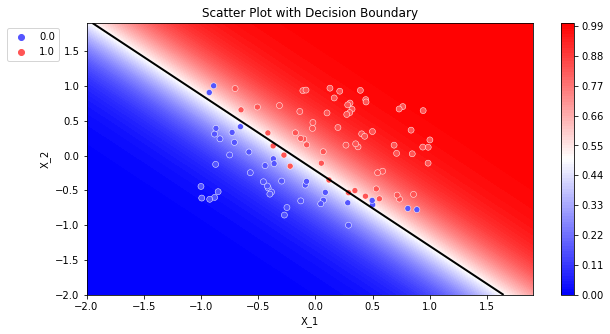

In [7]:
plot_probabilities_2d(X, y, log_reg_2d)

# 3. Метрики классификации. Мультиклассовая классификация <a class="anchor" id=3></a>

[к содержанию](#0)

Будем рассматривать метрики для задачи регрессии на следующем примере. Мы выбрали случайным образом десять пациентов из нашей таблицы и предсказали для них моделью `log_reg_full` ответы:

`y = (1, 2, 1, 1, 2, 1, 1, 2, 1, 1)`

`y_ = (1, 1, 0, 1, 0, 0, 1, 1, 0, 1)`

Все метрики, которые мы рассмотрим, основаны на матрице ошибок. С неё мы и начнём наш разбор.

>Матрица ошибок (`confusion matrix`) показывает все возможные исходы совпадения и несовпадения предсказания модели с действительностью. Используется для расчёта других метрик.

Допустим, у нас есть два класса и алгоритм, предсказывающий принадлежность каждого объекта одному из классов.

Назовём класс `1` **положительным исходом** (`positive`), а класс `0` — **отрицательным исходом** (`negative`).

Тогда матрица ошибок классификации будет выглядеть следующим образом:

<img src=ml3_img18.png>

Матрице соответствуют четыре возможных исхода классификации:

`True Positive (TP)` — количество ответов, обозначенных моделью как класс 1 (`y_ = 1`) и действительно являющихся классом 1 (`y = 1`).
`False Positive (FP)` — количество ответов, обозначенных моделью как класс 1 (`y_ = 1`), но в действительности являющихся классом 0 (`y = 0`).
`False Negative (FN)` — количество ответов, обозначенных моделью как класс 0 (`y_ = 0`), но в действительности являющихся классом 1 (`y = 1`).
`True Negative (TN)` — количество ответов, обозначенных моделью как класс 0 (`y_ = 0`) и действительно являющихся классом 0 (`y = 0`).
Для наглядности можно представить предсказания модели следующей схемой:

<img src=ml3_img19.png>

Давайте посмотрим, как будет выглядеть матрица ошибок для нашего примера предсказаний модели `log_reg_full`:

* `TP = 4`
* `FP = 2`
* `FN = 3`
* `TN = 1`

>**Примечание**. Нередко в русской литературе вы можете встретить перевод метрики `accuracy` как «точность», однако так же на русский язык переводится метрика `precision`, о которой мы поговорим далее. Поэтому, если вы используете термин «точность», старайтесь указывать, о какой именно метрике (`accuracy` или `precision`) идёт речь.

На основе матрицы ошибок составляются следующие метрики классификации ↓ 

>`Accuracy` (достоверность) — доля правильных ответов модели среди всех ответов. **Правильные ответы** — это истинно положительные (`True Positive`) и истинно отрицательные ответы (`True Negative`):

**`accuracy = (TP + TN) / (TP + TN + FP + FN)`**

**Интерпретация**: как много (в долях) модель угадала ответов.

Метрика изменяется в диапазоне от 0 до 1. Чем ближе значение к 1, тем больше ответов модель «угадала». 

Рассчитаем accuracy для нашего примера:

`accuarcy = (4 + 5)/(4 + 2 + 3 + 1) = 0.5`

Итак, наша `accuracy` равна `0.5`, то есть модель сделала верное предсказание для 50 % пациентов из выборки.

>`Accuracy` — самая простая и самая понятная метрика классификации, но у неё есть один существенный недостаток. **Она бесполезна, если классы сильно несбалансированы**.

>>Допустим, мы хотим оценить работу спам-фильтра почты. Спам-письма обозначены как Positive (1), а не-спам-письма — как Negative (0).
>>
>>У нас есть 100 не-спам-писем, 90 из которых наш классификатор определил верно (True Negative = 90, False Positive = 10), и 10 спам-писем, 5 из которых классификатор также определил верно (True Positive = 5, False Negative = 5).
>>
>>Тогда accuracy: (5+90)/(5+90+10+5) = 0.864
>>
>>Однако представим, что мы просто будем предсказывать все письма как не спам, то есть True Positive = 100, True Negative = 0, False Positive = 10, False Negative = 0.
>>
>>Тогда accuracy будет равна: (0+100)/(0+100+0+10) = 0.909
>>
>>Метрика выросла, однако, наша «модель» не обладает **никакой предсказательной силой**, так как изначально мы хотели определять письма со спамом. 
>>
>>Преодолеть это нам поможет переход с общей для всех классов метрики к отдельным показателям качества классов.

`Precision` (точность), или `PPV` (`Positive Predictive Value`) — это доля объектов, которые действительно являются положительными, по отношению ко всем объектам, названным моделью положительными.

`precision = TP / (TP + FP)`

<img src=ml3_img20.png>

Метрика также изменяется от 0 до 1. 

Интерпретация: способность отделить класс 1 от класса 0. Чем больше `precision`, тем меньше ложных попаданий. 

Именно `precision` не позволяет записать все ответы в один класс, так как в таком случае резко возрастает значение `False Positive` и метрика снижается.

Рассчитаем `precision` для нашего примера:

`precision = 4 / (4+2) = 0.67`

Таким образом, количество названных моделью больных диабетом и при этом действительно являющихся больными составляет `67 %` от всех пациентов.

`Precision` нужен в задачах, где от нас требуется **минимум ложных срабатываний**. Чем выше «цена» ложноположительного результата, тем выше должен быть `precision`.

Например, по камерам видеонаблюдения мы автоматически выявляем признаки драки на улицах и отправляем наряд полиции для урегулирования конфликта. Однако штат сотрудников сильно ограничен, реагировать на любой признак конфликта мы не можем, поэтому мы хотим уменьшить количество ложных вызовов. В такой ситуации мы выберем такую модель, у которой наибольший `precision`.

В предельном случае (когда `precision` равен 1) у модели отсутствуют ложные срабатывания.

`Recall` (полнота), или `TPR` (`True Positive Rate`) — это доля объектов, названных классификатором положительными, по отношению ко всем объектам положительного класса.

`recall = TP / (TP + FN)`

<img src=ml3_img21.png>

Метрика изменяется от 0 до 1.

Интерпретация: способность модели обнаруживать класс 1 вообще, то есть охват класса 1. Заметьте, что ложные срабатывания не влияют на recall. 

Рассчитаем `recall` для нашего примера:

`recall = 4 / (4 + 3) = 0.57`

`Recall` очень хорошо себя показывает в задачах, где важно **найти как можно больше объектов**, принадлежащих к классу 1.

Например, это различные диагностические задачи с серьёзными заболеваниями. В таких задачах последствия будут негативнее, если мы примем больного пациента за здорового, чем если мы примем здорового за больного. Нам важно охватить всех потенциально больных пациентов, чтобы сделать дополнительный анализ и удостовериться в результате.

Предельный случай (когда `recall` равен 1) означает, что модель нашла все объекты класса 1, например всех действительно больных пациентов. Однако метрика ничего не скажет о том, **с какой точностью мы это сделали**.

Метрики `precision` и `recall` не зависят от сбалансированности классов и в совокупности дают довольно исчерпывающее представление о классификаторе. Однако на практике часто бывает так, что увеличение одной из метрик может привести к уменьшению другой.

Концентрация только на одной метрике (`precision` или `recall`) **без учёта второй — сомнительная идея**.

В битве за максимум `precision` для класса 1 побеждает модель, которая всегда будет говорить говорить «нет». У неё вообще не будет ложных срабатываний.

В битве за максимум `recall` для класса 1 побеждает модель, которая всегда будет говорить «да». Она охватит все наблюдения класса 1. 

**В реальности необходимо балансировать между двумя этими метриками.**

Классическим примером является **задача определения оттока клиентов**.

Очевидно, что мы хотим найти как можно больше клиентов, которые потенциально могут уйти от нас. Чтобы повысить их лояльность, мы планируем использовать ресурсы колл-центра. Однако они ограничены и мы не можем звонить всем клиентам. Определив стратегию и ресурс для удержания клиентов, мы можем подобрать нужные пороги по precision и recall. Например, можно сосредоточиться на удержании только высокодоходных клиентов или тех, кто уйдёт с большей вероятностью. 

В таком случае нам подойдёт следующая метрика.

<img src=ml3_img22.png>

В частном случае, когда `beta = 1`, мы получаем равный вклад для `precision` и `recall`, а формула будет выражать простое среднее гармоническое, или метрику `F1` (`F1`-мера):

Рассчитаем метрику `F1` для нашего примера:

`F1 = 2 * (0.67 + 0.57) / (0.67 + 0.57) = 0.62`

В чём преимущество `F1`-меры?

Метрика равна своему максимуму (1), если и `precision`, и `recall` равны `1`. Но если хотя бы одна из метрик будет близка к 0, то и `F1` будет близка к 0. 

Несмотря на отсутствие бизнес-интерпретации, метрика `F1` является довольно распространённой и используется в задачах, где необходимо выбрать модель, которая балансирует между `precision` и `recall`.

Например, если цена дополнительной диагностики заболевания очень высока, то есть ложных срабатываний должно быть минимум, но при этом нам важно охватить как можно больше больных пациентов. 

Давайте обобщим всё вышесказанное в виде таблицы:

<img src=ml3_img23.png>

# 4. Логическия регрессия. Практика <a class="anchor" id=4></a>

[к содержанию](#0)

# 5. Деревья решений <a class="anchor" id=5></a>

[к содержанию](#0)

# 6. Введение в ансамбли: бэггинг. Случайные лес <a class="anchor" id=6></a>

[к содержанию](#0)

# 7. Деревья решений и случайный лес. Практика <a class="anchor" id=7></a>

[к содержанию](#0)

# 8. Итоги <a class="anchor" id=8></a>

[к содержанию](#0)